In [305]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# ucitavanje podataka
data = pd.read_csv('/content/drive/MyDrive/multiclass_data.csv', header=None)
data = data.values

# standardizacija parametara
mean = np.mean(data[:,0:5],axis=0)
std = np.std(data[:,0:5],axis=0)
for i in range(0,len(mean)):
  data[:,i] = (data[:,i]-mean[i])/std[i]

# dopunjavanje jedinicama
data = np.append(np.ones(len(data)).reshape(len(data),1),data,axis=1)

# podjela na testirajuci i obucavajuci skup
rows = data.shape[0]
ratio = 0.8
indices = np.random.permutation(rows)
ind_train = indices[0:round(ratio*rows)]
ind_test = indices[round(ratio*rows)::]
data_train = data[ind_train,:]
data_test = data[ind_test,:]

# cuvanje trening i test skupa
data_train = pd.DataFrame(data_train)
data_test = pd.DataFrame(data_test)  
data_train.to_csv("data_train.csv")
data_test.to_csv("data_test.csv")


In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [463]:
def gradijent_spust(alpha,m,N):
  k = 3 # broj klasa
  theta =  np.zeros([k,6])
  #theta = np.random.randn(k,6)
  theta[2,:] = [0,0,0,0,0,0]
  J = np.zeros([])
  fi = np.zeros(k)
  data = pd.read_csv('/content/data_train.csv', header=None)
  data = data.values[1:,1:]
  rows = data.shape[0]

  for epoha in range(0,N): # po epohama
    # trening skup se mijesa svaki u svakoj epohi
    indices = np.random.permutation(rows)
    data_train = data[indices,:]
    # prolazak kroz mini-sarze
    for j in range(0,round(data_train.shape[0]/m)):
      if j +1 == round(data_train.shape[0]/m):
        x = data_train[j*m:,0:6]
        y = data_train[j*m:,6]
      else:
        x = data_train[j*m:(j+1)*m,0:6]
        y = data_train[j*m:(j+1)*m,6]
      y_pred = np.zeros(len(y))
      # prolazak kroz jednu sarzu
      delta_J = np.zeros([3,6])
      pom = 0
      # prolazak kroz elemente sarze
      for i in range(0,len(y)):
        fi = np.exp(np.dot(theta,x[i,:]))
        fi = fi/sum(fi)
        y_pred[i] = np.argmax(fi)
        if fi[round(y[i])]>0:
          pom = pom + np.log(fi[round(y[i])])
        for i1 in range(0,k-1):
          delta_J[i1] = delta_J[i1] + (1 if y[i] == i1 else 0 - fi[i1])*x[i,:]
      theta = theta + alpha*delta_J/m
      J = np.append(J,pom/m) 
      if J.shape[0]>3:
        if np.abs(J[-1:]-J[-2:-1])<J[-1:]*0.05 and np.abs(J[-1:]-J[-3:--2])<J[-1:]*0.05:
          epoha = N

  return J[1:]

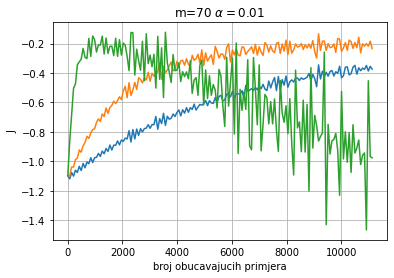

In [457]:
alpha = 0.03
m = 70
N = 80
J = gradijent_spust(alpha,m,N)
x_osa = np.linspace(0,len(J)-1,len(J))*m
plt.plot(x_osa,J)
plt.grid()
plt.xlabel('broj obucavajucih primjera')
plt.ylabel('J')
plt.title('m='+str(m)+r' $\alpha=$'+str(alpha))

alpha = 0.03
m = 70
N = 80
J = gradijent_spust(alpha,m,N)
x_osa = np.linspace(0,len(J)-1,len(J))*m
plt.plot(x_osa,J)

alpha = 0.3
m = 70
N = 80
J = gradijent_spust(alpha,m,N)
x_osa = np.linspace(0,len(J)-1,len(J))*m
plt.plot(x_osa,J)

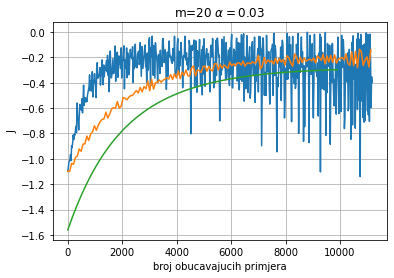

In [464]:
alpha = 0.03
m = 20
N = 80
J = gradijent_spust(alpha,m,N)
x_osa = np.linspace(0,len(J)-1,len(J))*m
plt.plot(x_osa,J)
plt.grid()
plt.xlabel('broj obucavajucih primjera')
plt.ylabel('J')
plt.title('m='+str(m)+r' $\alpha=$'+str(alpha))

alpha = 0.03
m = 70
N = 80
J = gradijent_spust(alpha,m,N)
x_osa = np.linspace(0,len(J)-1,len(J))*m
plt.plot(x_osa,J)

alpha = 0.03
m = 100
N = 100
J = gradijent_spust(alpha,m,N)
x_osa2 = np.linspace(0,len(J)-1,len(J))*m
plt.plot(x_osa2,J)

Text(0.5, 1.0, 'm=50 $\\alpha=$0.03')

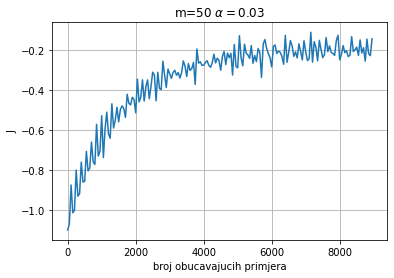

In [499]:
alpha = 0.03
m = 50
N = 60
J = gradijent_spust(alpha,m,N)
x_osa = np.linspace(0,len(J)-1,len(J))*m
plt.plot(x_osa,J)
plt.grid()
plt.xlabel('broj obucavajucih primjera')
plt.ylabel('J')
plt.title('m='+str(m)+r' $\alpha=$'+str(alpha))

In [497]:
def softmax(x_test):
  alpha = 0.03
  m = 70
  N = 100
  k = 3 # broj klasa
  theta =  np.zeros([k,6])
  fi = np.zeros(k)
  data_train = pd.read_csv('/content/data_train.csv', header=None)

  # procjena optimalnih parametara
  for epoha in range(0,N): # po epohama
    # trening skup se mijesa svaki u svakoj epohi
    indices = np.random.permutation(rows)
    data_train = data[indices,:]
    # prolazak kroz mini-sarze
    for j in range(0,round(data_train.shape[0]/m)):
      if j == round(data_train.shape[0]/m)-1:
        x = data_train[j*m:,0:6]
        y = data_train[j*m:,6]
      else:
        x = data_train[j*m:(j+1)*m,0:6]
        y = data_train[j*m:(j+1)*m,6]
      y_pred = np.zeros(len(y))
      # prolazak kroz jednu sarzu
      delta_J = np.zeros([3,6])
      for i in range(0,len(y)):
        fi = np.exp(np.dot(theta,x[i,:]))
        fi = fi/sum(fi)
        y_pred[i] = np.argmax(fi)
        for i1 in range(0,k-1):
          delta_J[i1] = delta_J[i1] + (1 if y[i] == i1 else 0 - fi[i1])*x[i,:]
      theta = theta + alpha*delta_J/m

  # predikcije na test skupu
  y_pred = np.zeros(len(x_test))

  for i in range(0,len(x_test)):
    fi = np.zeros(k)
    for j in range(0,k):
      fi[j] = np.exp(np.dot(theta[j,:],x_test[i,0:6]))
    y_pred[i] = np.argmax(fi)

  return y_pred

[[11  0  0]
 [ 0 14  0]
 [ 0  3  8]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Legend does not support 'y' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if sys.path[0] == '':


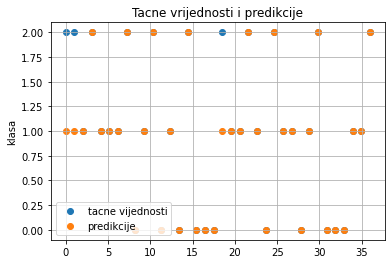

In [498]:
# predikcije na test skupu
data_test = pd.read_csv('/content/data_test.csv', header=None)
data_test = data_test.values[1:,1:]
y = data_test[:,6]
y_pred = softmax(data_test[:,0:6])

print(confusion_matrix(np.floor(data_test[:,6]),y_pred))
x_osa = np.linspace(0,len(y),len(y))
plt.scatter(x_osa,y)
plt.scatter(x_osa,y_pred)
plt.title('Tacne vrijednosti i predikcije')
plt.legend('y','y_{pred}')
plt.grid()
plt.ylabel('klasa')
plt.legend(['tacne vijednosti','predikcije'])

In [ ]:
100-2/(19+22+9+3)*100

96.22641509433963